In [2]:
# Ejemplo de Lotka-Volterra

import numpy as np
from scipy import integrate, linalg
import pylab as plt

# Definimos un vector X: X[0]=x, X[1]=y

# Definimos los parámetros 
a = 1.
b = 0.1
c = 1.5
d = 0.75

def dX_dt(X, t=0):
    """ El lado derecho del sistema de ecuaciones """
    return np.array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*b*X[0]*X[1] ])

In [41]:
# Los puntos críticos del sistema
X_f0 = np.array([     0. ,  0.])
X_f1 = np.array([ c/(d*b), a/b])

print('Puntos críticos del sistema para estos valores de parámetros')
print('X_f0:', X_f0)
print('X_f1:', X_f1)

# En los puntos críticos se anulan las derivadas. 
all(dX_dt(X_f0) == np.zeros(2) ) and all(dX_dt(X_f1) == np.zeros(2))

def d2X_dt2(X, t=0):
    """ El Jacobiano evaluado en X}. """
    return np.array([[a -b*X[1],   -b*X[0]     ],
                  [b*d*X[1] ,   -c +b*d*X[0]] ])

Puntos críticos del sistema para estos valores de parámetros
X_f0: [0. 0.]
X_f1: [20. 10.]


In [42]:
# El Jacobiano evaluado en el primer punto crítico X_f0
A_f0 = d2X_dt2(X_f0)
print('A_f0:')
print(A_f0)

A_f0:
[[ 1.  -0. ]
 [ 0.  -1.5]]


In [43]:
# El Jacobiano evaluado en el segundo punto crítico X_f1
A_f1 = d2X_dt2(X_f1)                    
print('A_f1:')
print(A_f1)
                                
# Y sus eigenvalores son +/- sqrt(c*a).j:
lambda1, lambda2 = linalg.eigvals(A_f1) 
print('Eigenvalores:', lambda1, lambda2)
# >>> (1.22474j, -1.22474j)

# Los eigenvalores son imaginarios
# Con periodo
T_f1 = 2*np.pi/abs(lambda1) 
print('Periodo:', T_f1)

A_f1:
[[ 0.   -2.  ]
 [ 0.75  0.  ]]
Eigenvalores: 1.224744871391589j -1.224744871391589j
Periodo: 5.130199320647456


In [44]:
# Integramos el sistema de ecuaciones de Lotka-Volterra usando odeint

t = np.linspace(0, 15,  1000)              # Rango de tiempo de integración
X0 = np.array([10, 5])                     # Condiciones iniciales: 10 conejos y 5 zorros
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']

'Integration successful.'

<Figure size 432x288 with 0 Axes>

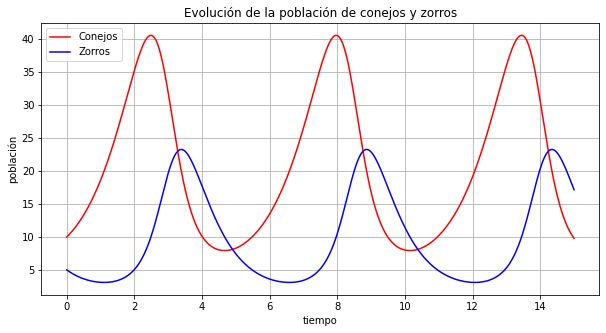

In [45]:
# Graficamos las soluciones

conejos, zorros = X.T


f1 = plt.figure();
plt.figure(figsize=(10, 5)); 
plt.plot(t, conejos, 'r-', label='Conejos');
plt.plot(t, zorros  , 'b-', label='Zorros');
plt.grid();
plt.legend(loc='best');
plt.xlabel('tiempo');
plt.ylabel('población');
plt.title('Evolución de la población de conejos y zorros');
plt.show();

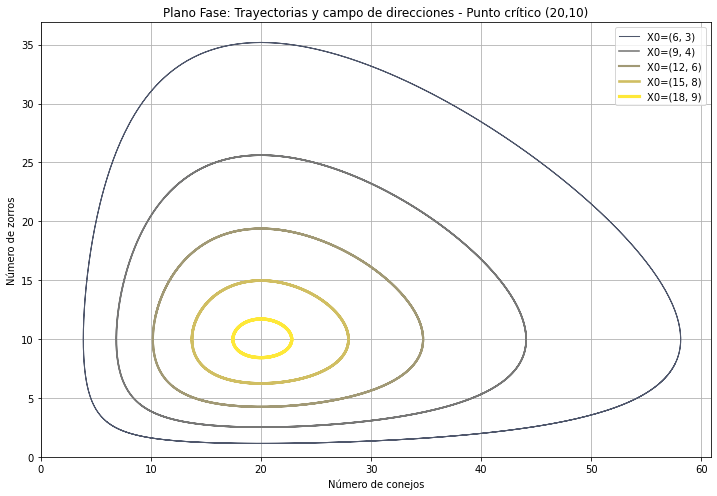

In [46]:
# Graficamos la familia de soluciones en el espacio fase para distintas condiciones iniciales

values  = np.linspace(0.3, 0.9, 5)                         # posición de X0 entre X_f0 y X_f1
vcolors = plt.cm.cividis(np.linspace(0.3, 1., len(values)))  # colores para cada trayectoria

plt.figure(figsize=(12, 8)); 

#-------------------------------------------------------
# grafica las trayectorias
for v, col in zip(values, vcolors):
    X0 = v * X_f1                               # punto inicial
    X = integrate.odeint( dX_dt, X0, t)         # Integración para cada condición inicial
    plt.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )

#-------------------------------------------------------
# define una malla y calcula la pendiente (dirección) en cada punto
ymax = plt.ylim(ymin=0)[1]                        # get axis limits
xmax = plt.xlim(xmin=0)[1]
nb_points   = 20

x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)

X1 , Y1  = np.meshgrid(x, y)                       # crea la malla
DX1, DY1 = dX_dt([X1, Y1])                      # calcula la tasa de crecimiento
M = (np.hypot(DX1, DY1))                           # distancia euclideana 
M[ M == 0] = 1.                                 # Evita divisiones entre 0 
DX1 /= M                                        # Normaliza el tamaño de cada flecha
DY1 /= M

#-------------------------------------------------------
# Dibujar los campos de direcciones usando la función quiver de Matplotlib 
# EL color de las flechas indica la rapidez de crecimiento

plt.title('Plano Fase: Trayectorias y campo de direcciones - Punto crítico (20,10)')
plt.xlabel('Número de conejos')
plt.ylabel('Número de zorros')
plt.legend(loc='best')
plt.grid()
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.show()

In [10]:
import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd

Ejercicio 1:

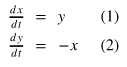

In [72]:
#Encontrando los eigenvalores de la matriz
A = np.array([[0,1],[-1,0]])
print(A)

[[ 0  1]
 [-1  0]]


In [73]:
eigvals, eigvecs = la.eig(A)
print('Eigenvalores:', eigvals)
print('Eigenvectores:', eigvecs) 

Eigenvalores: [0.+1.j 0.-1.j]
Eigenvectores: [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        +0.70710678j 0.        -0.70710678j]]


Punto crítico del tipo centro

In [74]:
#Ahora la matriz B=0 y se rezuelve el sistema ax=0
B=np.zeros((2,1))
pcr=la.solve(A,B)
print('x=',pcr[0],'\n','y=',pcr[1])

x= [-0.] 
 y= [0.]


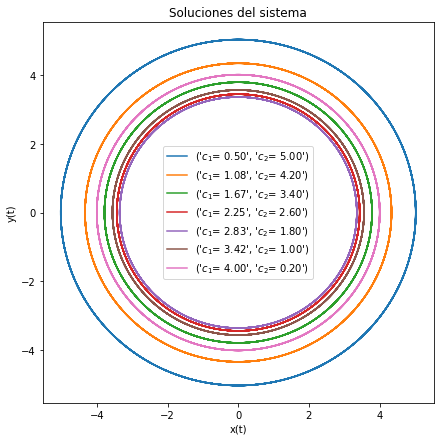

In [92]:
#función solución
def x(t,c1,c2):
  t0=np.zeros((1000,))
  t0=t
  dydt=[c1*np.cos(t0)+c2*np.sin(t0),-c1*np.sin(t0)+c2*np.cos(t0)]
  return dydt

t=np.linspace(0,50,1000)
c1=list(np.linspace(0.5,4,7))
c2=list(np.linspace(5,0.2,7))

#Graficamos
plt.figure(figsize=(7,7))
for c,d in zip(c1,c2):
  v=x(t,c,d)
  s=np.array(v)
  plt.plot(s[0,:],s[1,:],label=('$c_1$= {:.2f}'.format(c),'$c_2$= {:.2f}'.format(d)))
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Soluciones del sistema')
plt.legend()
plt.show()


Ejercicio 2:

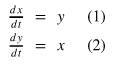

In [88]:
A = np.array([[0,1],[1,0]])
print(A)

[[0 1]
 [1 0]]


In [89]:
eigvals, eigvecs = la.eig(A)
print('Eigenvalores:', eigvals)
print('Eigenvectores:', eigvecs)

Eigenvalores: [ 1.+0.j -1.+0.j]
Eigenvectores: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Punto silla

In [90]:
#Ahora la matriz B=0 y se rezuelve el sistema ax=0
B=np.zeros((2,1))
pcr=la.solve(A,B)
print('x=',pcr[0],'\n','y=',pcr[1])

x= [0.] 
 y= [0.]


Definitivamente es del tipo silla, la solución del sistema es (x y)=(c1e^t-c2e^-tc1e^t+c2e^-t)



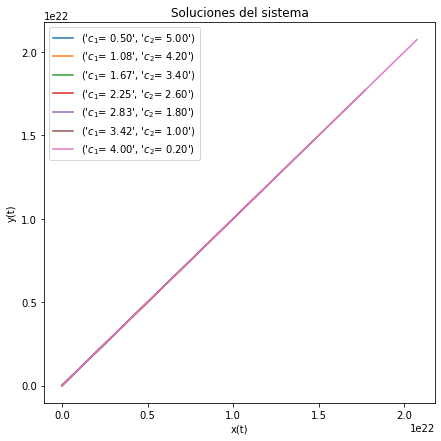

In [100]:
def x(t,c1,c2):
  dydt=[c1*np.exp(t)-c2*np.exp(-t), c1*np.exp(t)+c2*np.exp(-t)]
  return dydt

  t=np.linspace(-3,3,500)
  c1=list(np.linspace(-1.3,1,7))
  c2=list(np.linspace(1.2,-1,7))

#Graficamos
plt.figure(figsize=(7,7))
for c,d in zip(c1,c2):
  v=x(t,c,d)
  s=np.array(v)
  plt.plot(s[0,:],s[1,:],label=('$c_1$= {:.2f}'.format(c),'$c_2$= {:.2f}'.format(d)))
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Soluciones del sistema')
plt.legend()
plt.show()



Ejercicio 3:

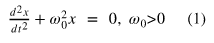

En esta ecuación al aplicar cambio de variable podemos y=dx/dt podemos descomponer en lo siguiente:

dx/dt=y

dy/dt= -wo^2x

In [103]:
#Encontramos los eigenvalores con una constante w0
w0=10
A=np.array([[0,1],[w0,0]])
B=np.zeros((2,1))
pcr=la.solve(A,B)
print('x=',pcr[0],'y=',pcr[1])

x= [0.] y= [0.]


Punto crítico tipo centro, la solucion del sistema es (x y)=(c1cos(w0t)´+c2sin(w0t)-c1sin(w0t)+c2cos(w0t))

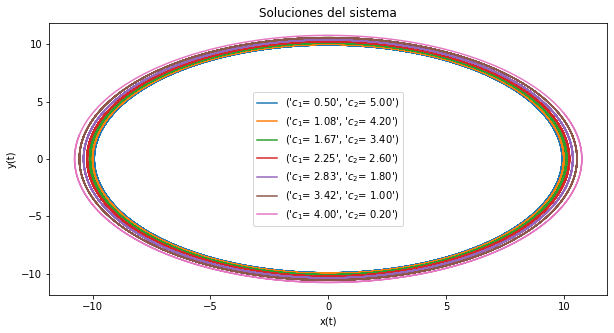

In [114]:
def x(t,c1,c2,w0):
  dydt=[c1*np.cos(w0*t)+c2*np.sin(w0*t),-c1*np.sin(w0*t)+c2*np.cos(w0*t)]
  return dydt

  w0=10

  t=np.linspace(-10,50,1000)
  c1=list(np.linspace(-5,4,7))
  c2=list(np.linspace(-5,-0.2,7))

#Grafiquemos
plt.figure(figsize=(10,5))
for c,d in zip(c1,c2):
  v=x(t,w0,c,d)
  s=np.array(v)
  plt.plot(s[0,:],s[1,:],label=('$c_1$= {:.2f}'.format(c),'$c_2$= {:.2f}'.format(d)))
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Soluciones del sistema')
plt.legend()
plt.show()

Ejercicio 4:

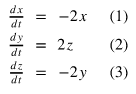

In [171]:
#Obtener los eigenvalores de la matriz del sistema dependiente
A = np.array([[-2,0,0],[0,0,2],[0,-2,0]])
A1 = np.array([[0,-2],[2,0]])
eigenval, eigenvec = la.eig(A)
print(eigenval)
eigenval, eigenvec = la.eig(A1)

[ 0.+2.j  0.-2.j -2.+0.j]


Encontrando puntos críticos resolviendo el sistema:

In [172]:
B=np.zeros((3,1))
pcr=la.solve(A,B)
pcr

array([[-0.],
       [-0.],
       [ 0.]])

La gráfica del espacio fase en R3 será con valores de las constantes C en específico, i=1,2,3...

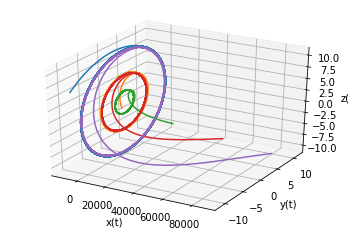

In [179]:
#Definiendo
def x(t, c1, c2, c3):
  dydt=[c1*np.exp(-2*t), c2*np.cos(2*t)+c3*np.sin(2*t), -c2*np.sin(2*t)+c3*np.cos(2*t)]
  return dydt

t=np.linspace(-5,50,1000)
c1=list(np.linspace(-0.5,4,5))
c2=list(np.linspace(5,-0.2,5))
c3=list(np.linspace(-10,11,5))

#Graficamos
plt.figure()
ax=plt.axes(projection='3d')
for c,d,e in zip(c1,c2,c3):
  v=x(t,c,d,e)
  s=np.array(v)
  ax.plot3D(s[0,:],s[1,:],s[2,:])
plt.xlabel('x(t)') 
plt.ylabel('y(t)')
ax.set_zlabel('z(t)')

plt.show()

Ejercicio 5:

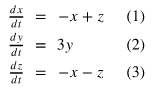

In [196]:
#Obtener los eigenvalores por separado
A1 = np.array([[-1,0,1],[0,3,0],[-1,0,-1]])
A2 = np.array([[-1,1],[-1,-1]])
print(A1)
print(A2)

[[-1  0  1]
 [ 0  3  0]
 [-1  0 -1]]
[[-1  1]
 [-1 -1]]


In [197]:
eigvals, eigvecs = la.eig(A1)
print('Eigenvalores:', eigvals)
print('Eigenvectores:', eigvecs)

Eigenvalores: [-1.+1.j -1.-1.j  3.+0.j]
Eigenvectores: [[0.70710678+0.j         0.70710678-0.j         0.        +0.j        ]
 [0.        +0.j         0.        -0.j         1.        +0.j        ]
 [0.        +0.70710678j 0.        -0.70710678j 0.        +0.j        ]]


Los eigenvalores de la matriz xz nos dicen que el punto crítico es de la forma foco espiral estable

In [184]:
#Encontrando puntos críticos

B=np.zeros((3,1))
pcr=la.solve(A,B)
print('x=',pcr[0],'\n','y=',pcr[1])

x= [-0.] 
 y= [-0.]


Graficamos de igual forma para valores de c, i=1,2,3...

In [193]:
#Definiendo
def x(t, c1, c2, c3):
  dydt=[np.exp(-t)*(c1*np.sin(t)+c3*np.cos(t)), c2*np.exp(3*t), np.exp(-t)*(c3*np.sin(t)-c1*np.cos(t))]
  return dydt

  t=np.linspace(-10,20,1000)
  c1=list(np.linspace(-0.5,4,5))
  c2=list(np.linspace(5,-0.2,5))
  c3=list(np.linspace(-10,11,5))

  fig=plt.figure(figsize=(10,10))
  ax=plt.axes(projection='3d')
  for c,d,e in zip(c1,c2,c3):
    v=x(t,c,d,e)
    s=np.array(v)
  ax.plot3D(s[0,:],s[1,:],s[2,:])
  plt.xlabel('x(t)')
  plt.ylabel('y(t)')
  ax.set_zlabel('z(t)')
  plt.title('hola')
  plt.show()

Problemas de valor inicial:

Ejercicio 6:

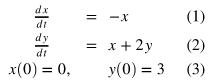

De forma matricial queda d(x y)/dt=(-1 01 2)(xy)=(-xx+2y)

In [12]:
from scipy.integrate import odeint, solve_ivp

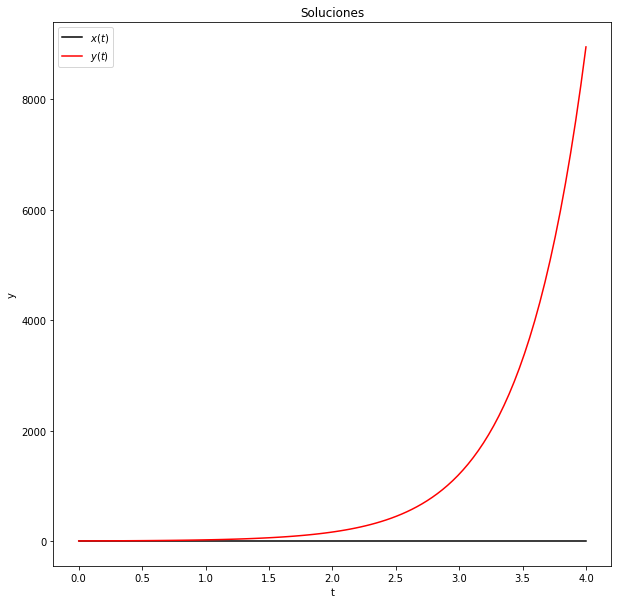

In [221]:
def Ec6(y,t):
  x, v = y
  dydt= [-x, x+2*v]
  return dydt
  
t=np.linspace(0,4,100)
y0=[0,3]

#Graficamos
plt.figure(figsize=(10,10))
y=odeint(Ec6,y0,t)
plt.plot(t,y[0:,0],'k',label='$x(t)$')
plt.plot(t,y[0:,1],'r',label='$y(t)$')
plt.title('Soluciones')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

Ejercicio 7:

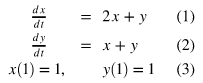

De igual forma lo escribimos de forma matricial:

d(x y)/dt=(2 11 1)(xy)=(2x+yx+y)

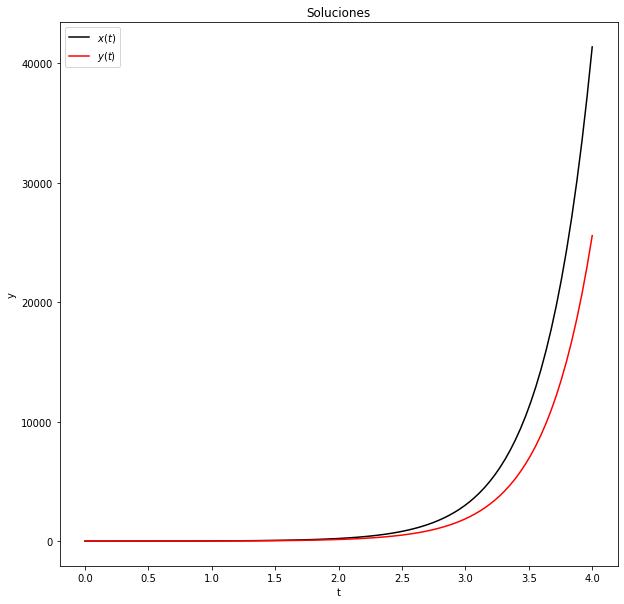

In [226]:
def Ec7(y,t):
  x, v = y
  dydt= [2*x+v, x+v]
  return dydt
  
t=np.linspace(0,4,100)
y0=[1,1]

#Graficamos
plt.figure(figsize=(10,10))
y=odeint(Ec7,y0,t)
plt.plot(t,y[0:,0],'k',label='$x(t)$')
plt.plot(t,y[0:,1],'r',label='$y(t)$')
plt.title('Soluciones')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

Ejercicio 8:

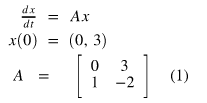

Forma matricial:

d(x1 x2)/dt=(0 31 -2)(x1x2)=(3x2x1-2x2)

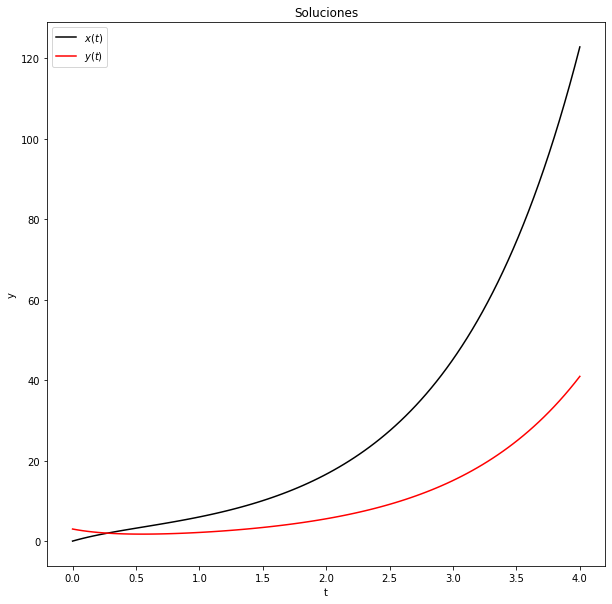

In [228]:
def Ec8(y,t):
  x1, x2 = y
  dydt= [3*x2, x1-2*x2]
  return dydt
  
t=np.linspace(0,4,100)
y0=[0,3]

#Graficamos
plt.figure(figsize=(10,10))
y=odeint(Ec8,y0,t)
plt.plot(t,y[0:,0],'k',label='$x(t)$')
plt.plot(t,y[0:,1],'r',label='$y(t)$')
plt.title('Soluciones')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

Ejercicio 9:

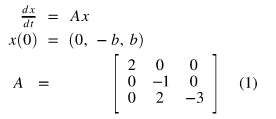

Forma matricial:

d(x1 x2 x3)/dt= 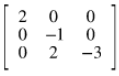(x1x2x3)=(2x1-x2*2x2-3x3)

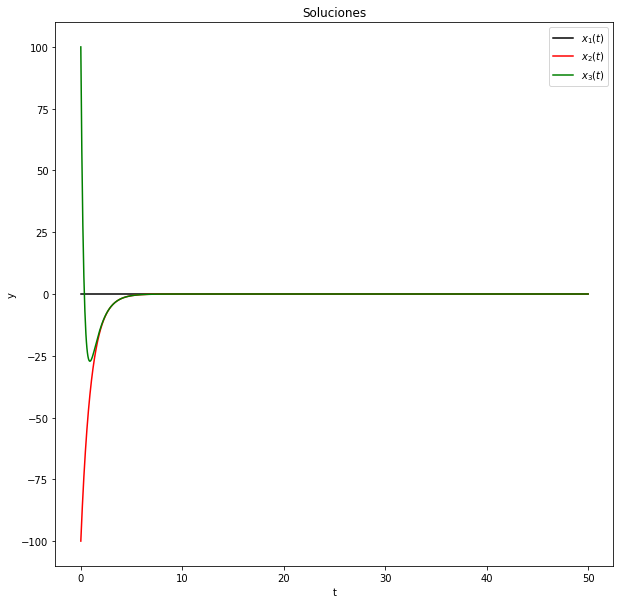

In [13]:
def Ec9(y,t):
  x1, x2, x3 = y
  return [2*x1, -x2, 2*x2-3*x3]
  
t=np.linspace(0,50,1000)
A=100
y0=[0,-A,A]

#Graficamos
plt.figure(figsize=(10,10))
y=odeint(Ec9,y0,t)
plt.plot(t,y[0:,0],'k',label='$x_1(t)$')
plt.plot(t,y[0:,1],'r',label='$x_2(t)$')
plt.plot(t,y[0:,2],'g',label='$x_3(t)$')
plt.title('Soluciones')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

Ejercicio 10:

Se tiene el siguiente sistema de resortes acoplados con dos masas.

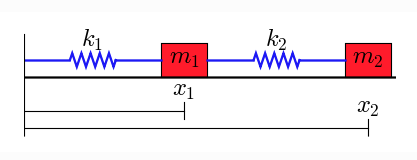 

El sistema esta sujeto del primer resorte de la izquierda. Cuando el sistema se deja en reposo, las longitudes de los resortes son $L_1$ y $L_2$.

Las ecuaciones de movimiento estan dadas por las siguientes ecuaciones diferenciales acopladas:

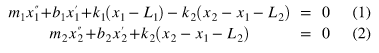

Encuentre las soluciones como funciones de $t$ y grafíquelas, así como las trayectorias en el espacio fase.

Suponga que $L_1=L_2=1$ y que las masas son iguales $m_1=m_2=1$.

10.1) Encuentre los eigenvalores del sistema y diga como son las soluciones.

10.2) Caso sin fricción. $b_1=b_2=0$, $k_1=6$, $k_2=4$, condiciones iniciales $(x_1(0), x_1^{'}(0), x_2(0), x_2^{'}(0))=(1,0,4,0)$

10.3) Igual que el caso anterior pero, con fricción: $b_1=0.1, b_2=0.2$

Con L1=L2=L3 Y M1=M2=1 y haciendo cambio de variable queda:

d(x1x2y1y2)/dt=(y1y2-(k1+k2)x1+k2x2-b1y1+(k1-k2)k2x1-k2x2-b2y2+k2)

Omitiendo la fricción:

b1=b2=0
K1=6
K2=4

In [21]:
def f(y,t, k1, k2, b1, b2):
  x1, x2, v1, v2 = y
  dxdt= [v1, v2, (k1+k2)*x1+k2*x2-b1*v1+k1-k2, k2*x1-k2*x1-k2*x2-b2*x2-b2*v2+k2]
  return dxdt

k1=6
k2=4
b1=b2=0
y0=[1,4,0,0]

In [22]:
B=np.array([[0,0,1,0],[0,0,0,1],[-(k1+k2), k2, -b1, 0],[k2, -k2, 0, b2]])
eigenval, eigenvec = la.eig(B)
print(eigenval)
print(eigenvec)

[-7.84812828e-18+3.46410162j -7.84812828e-18-3.46410162j
  3.56037039e-17+1.41421356j  3.56037039e-17-1.41421356j]
[[ 5.40083802e-18-2.48069469e-01j  5.40083802e-18+2.48069469e-01j
  -3.71147146e-17-2.58198890e-01j -3.71147146e-17+2.58198890e-01j]
 [ 6.88127078e-18+1.24034735e-01j  6.88127078e-18-1.24034735e-01j
  -4.78087849e-17-5.16397779e-01j -4.78087849e-17+5.16397779e-01j]
 [ 8.59337849e-01+0.00000000e+00j  8.59337849e-01-0.00000000e+00j
   3.65148372e-01+2.43165361e-17j  3.65148372e-01-2.43165361e-17j]
 [-4.29668924e-01+2.20804798e-18j -4.29668924e-01-2.20804798e-18j
   7.30296743e-01+0.00000000e+00j  7.30296743e-01-0.00000000e+00j]]


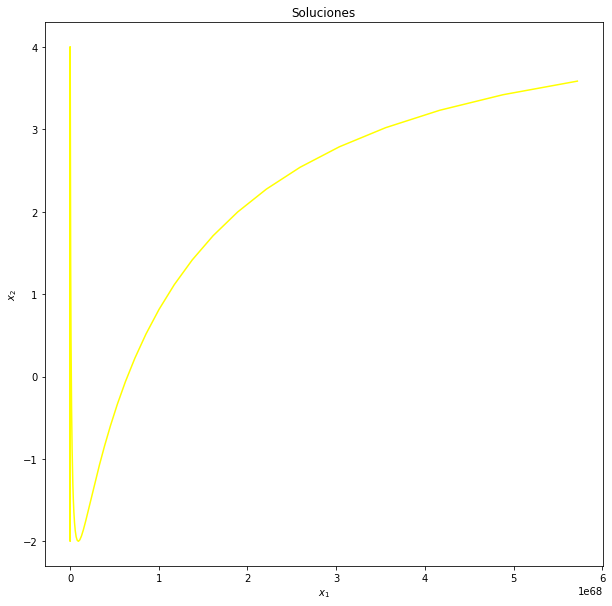

In [23]:
t=np.linspace(0,50,1000)
k1=6
k2=4
b1=b2=0
y0=[1,4,0,0]
y=odeint(f,y0,t,args=(k1,k2,b1,b2))

#Grafiquemos
plt.figure(figsize=(10,10))
plt.plot(y[0:,0],y[0:,1],color='yellow')
plt.title('Soluciones')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

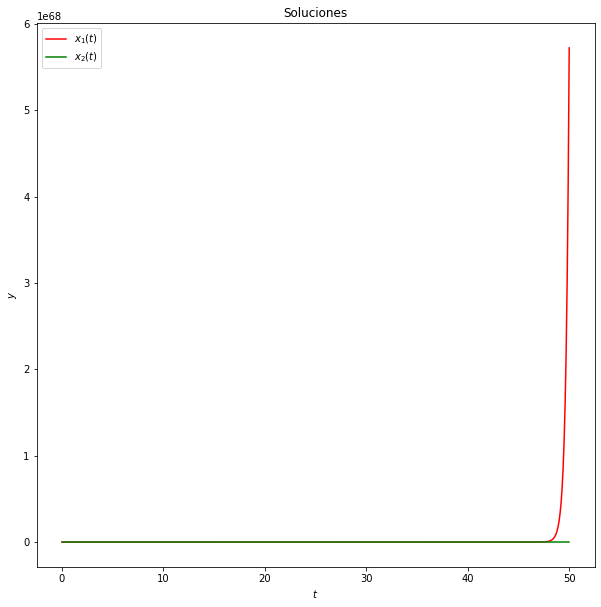

In [26]:
#Ahora soluciones pero contra el tiempo
#Grafiquemos
plt.figure(figsize=(10,10))
plt.plot(t,y[0:,0],color='r', label='$x_1(t)$')
plt.plot(t,y[0:,1],color='g', label='$x_2(t)$')
plt.title('Soluciones')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend()
plt.show()

Ejercicios resueltos del github original:

In [27]:
# Resolviendo Ejercicio 7

import numpy as np
from scipy import integrate, linalg
import pylab as plt

# Definimos un vector X: X[0]=x, X[1]=y
# Definimos la Matriz A 

A7 = np.array([[2,1], [1,1]])
print('A =', A7)

def dX_dt(X, t=1):
    """ El lado derecho del sistema de ecuaciones """
    return np.array([ 2*X[0] + X[1] ,
                  X[0]+X[1]])
    
# Los puntos críticos del sistema
X_f0 = np.array([     0. ,  0.])

print('Punto crítico del sistema')
print('Punto crítico X_f0:', X_f0)
print(' ')
# En los puntos críticos se anulan las derivadas. 
all(dX_dt(X_f0) == np.zeros(2) )
                                
# Aplicamos la biblioteca scipy.linalg.eig()
eigvals, eigvecs = linalg.eig(A7)
print('Eigenvalores:', eigvals)
print('Eigenvectores:', eigvecs)

A = [[2 1]
 [1 1]]
Punto crítico del sistema
Punto crítico X_f0: [0. 0.]
 
Eigenvalores: [2.61803399+0.j 0.38196601+0.j]
Eigenvectores: [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


In [28]:
# Solución
# Los eigenvectores son linealmente independientes
lambda1 = eigvals[0]
lambda2 = eigvals[1]
print('Eigenvalores')
print('lambda1= ', lambda1)
print('lambda2= ', lambda2)
print(' ')
print('Eigenvectores')
v1 = eigvecs[:,0]
v2 = eigvecs[:,1]
print('v1=',v1)
print('v2=',v2)

Eigenvalores
lambda1=  (2.618033988749895+0j)
lambda2=  (0.3819660112501052+0j)
 
Eigenvectores
v1= [0.85065081 0.52573111]
v2= [-0.52573111  0.85065081]


In [29]:
# Solución numérica
# Integramos el sistema de ecuaciones de Lotka-Volterra usando odeint

t = np.linspace(1, 5,  500)              # Rango de tiempo de integración
X0 = np.array([1, 1])                     # Condiciones iniciales
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']

'Integration successful.'

<Figure size 432x288 with 0 Axes>

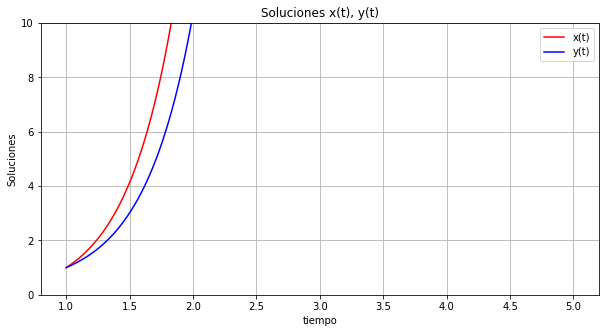

In [30]:
x, y = X.T

f1 = plt.figure();
plt.figure(figsize=(10, 5)); 
plt.plot(t, x, 'r-', label='x(t)');
plt.plot(t, y  , 'b-', label='y(t)');
plt.grid();
plt.ylim(0, 10)
plt.legend(loc='best');
plt.xlabel('tiempo');
plt.ylabel('Soluciones');
plt.title('Soluciones x(t), y(t)');
plt.show();

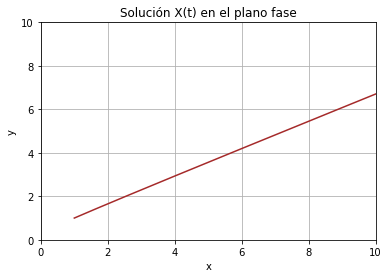

In [31]:
# Solución en el plano fase

plt.plot(x, y, 'brown')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.ylim(0, 10)
plt.xlim(0, 10)
plt.title('Solución X(t) en el plano fase')
plt.show()

Ejemplo de Solución de un sistema 3x3

Resolveremos el sistema

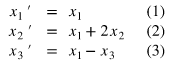

con condiciones iniciales $\vec{X}(0)=(1,0,0)$.

O si lo escribimos de forma matricial

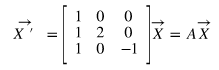

Buscaremos los eigenvalores y eigenvectores de la matriz $A$

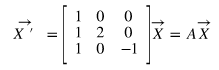

image.png

donde $P$ es la matriz de los eigenvectores y $\Lambda$ la matriz diagonal de los eigenvalores.

In [45]:
import numpy as np
from scipy import integrate, linalg
import pylab as plt

# Definimos un vector X: X[0]=x, X[1]=y, X[2]=z
# Definimos la Matriz A 

A3 = np.array([[1,0,0],[1,2,0], [1,0,-1]])
print('A =', A3)

def dX_dt(X,t=0):
    """ El lado derecho del sistema de ecuaciones """
    return np.array([X[0], X[0] + 2*X[1] ,
                  X[0]-X[1]])
    
# Los puntos críticos del sistema
X_f0 = np.array([ 0.0 , 0.0, 0.0])

print('Punto crítico del sistema')
print('Punto crítico X_f0:', X_f0)
print(' ')
# En los puntos críticos se anulan las derivadas. 
all(dX_dt(X_f0) == np.zeros(3) )
                                
# Aplicamos la biblioteca scipy.linalg.eig()
eigvals, eigvecs = linalg.eig(A3)
print('Eigenvalores:', eigvals)
print('Eigenvectores:', eigvecs)

A = [[ 1  0  0]
 [ 1  2  0]
 [ 1  0 -1]]
Punto crítico del sistema
Punto crítico X_f0: [0. 0. 0.]
 
Eigenvalores: [-1.+0.j  2.+0.j  1.+0.j]
Eigenvectores: [[ 0.          0.          0.66666667]
 [ 0.          1.         -0.66666667]
 [ 1.          0.          0.33333333]]


In [46]:
# Solución
# Los eigenvectores son linealmente independientes
lambda1 = eigvals[0]
lambda2 = eigvals[1]
lambda3 = eigvals[2]
print('Eigenvalores')
print('lambda1= ', lambda1)
print('lambda2= ', lambda2)
print('lambda3= ', lambda3)
print(' ')
print('Eigenvectores')
v1 = eigvecs[:,0]
v2 = eigvecs[:,1]
v3 = eigvecs[:,2]
print('v1=',v1)
print('v2=',v2)
print('v3=',v3)

Eigenvalores
lambda1=  (-1+0j)
lambda2=  (2+0j)
lambda3=  (1+0j)
 
Eigenvectores
v1= [0. 0. 1.]
v2= [0. 1. 0.]
v3= [ 0.66666667 -0.66666667  0.33333333]


In [47]:
# La solución del sistema 
# Solución numérica
# Integramos el sistema de ecuaciones de Lotka-Volterra usando odeint

t = np.linspace(0, 3,  300)              # Rango de tiempo de integración
X0 = np.array([1, 0, 0])                     # Condiciones iniciales
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']

'Integration successful.'

<Figure size 432x288 with 0 Axes>

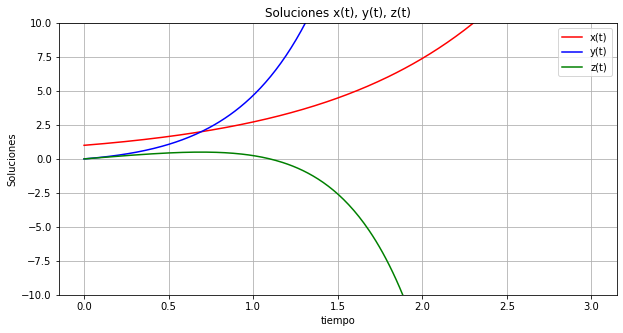

In [48]:
x, y, z = X.T

f1 = plt.figure();
plt.figure(figsize=(10, 5)); 
plt.plot(t, x, 'r-', label='x(t)');
plt.plot(t, y  , 'b-', label='y(t)');
plt.plot(t, z  , 'g-', label='z(t)');
plt.grid();
plt.ylim(-10, 10)
plt.legend(loc='best');
plt.xlabel('tiempo');
plt.ylabel('Soluciones');
plt.title('Soluciones x(t), y(t), z(t)');
plt.show();

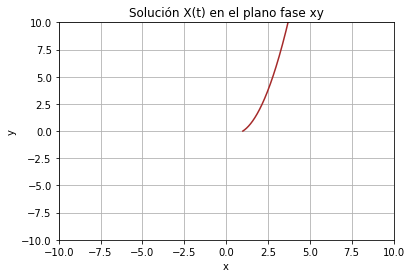

In [49]:
# Solución en el plano fase

plt.plot(x, y, 'brown')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.title('Solución X(t) en el plano fase xy')
plt.show()

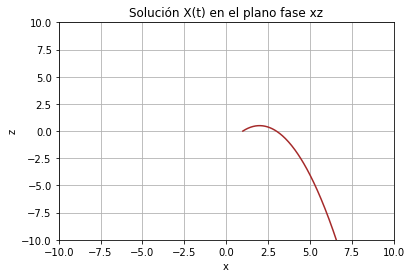

In [50]:
plt.plot(x, z, 'brown')
plt.xlabel('x')
plt.ylabel('z')
plt.grid()
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.title('Solución X(t) en el plano fase xz')
plt.show()

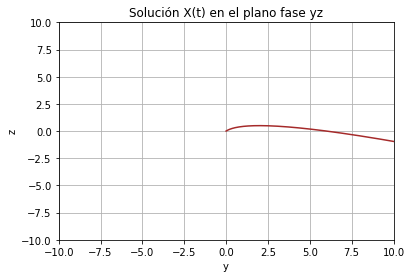

In [51]:
plt.plot(y, z, 'brown')
plt.xlabel('y')
plt.ylabel('z')
plt.grid()
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.title('Solución X(t) en el plano fase yz')
plt.show()

Text(0.5, 0.92, 'Solución en el espacio fase (x(t),y(t),z(t))')

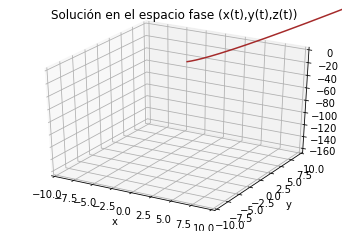

In [52]:
# Solución en el plano fase
 
# importing mplot3d toolkits, numpy and matplotlib
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
  
fig = plt.figure()
  
# syntax for 3-D projection
ax = plt.axes(projection ='3d')


plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.xlabel('x');
plt.ylabel('y');

# defining all 3 axes
x, y, z = X.T
  
# plotting
ax.plot3D(x, y, z, 'brown')
ax.set_title('Solución en el espacio fase (x(t),y(t),z(t))')

La solución analítica de esta ecuación con 3 eigenvalores reales distintos es:

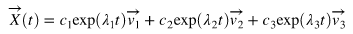

In [53]:
# Solución del sistema
t = np.linspace(0, 3,  300)              # Rango de tiempo de integración

# Xsol=c1*np.exp(lambda1*t)*v1[0]+c2*np.exp(lambda2*t)*v2[0]+c3*np.exp(lambda3*t)*v3[0]
# Ysol=c1*np.exp(lambda1*t)*v1[1]+c2*np.exp(lambda2*t)*v2[1]+c3*np.exp(lambda3*t)*v3[1]
# Zsol=c1*np.exp(lambda1*t)*v1[2]+c2*np.exp(lambda2*t)*v2[2]+c3*np.exp(lambda3*t)*v3[2]


# Aplicamos las condiciones iniciales
# Xsol(0) = c1*b11 + c2*b12 + c3*b13 = 1
# Ysol(0) = c1*b21 + c2*b22 + c3*b23 = 0
# Zsol(0) = c1*b31 + c2*b32 + c3*b33 = 0


b11 = v1[0]
b12 = v2[0]
b13 = v3[0]
b21 = v1[1]
b22 = v2[1]
b23 = v3[1]
b31 = v1[2]
b32 = v2[2]
b33 = v3[2]

In [54]:
# Buscaremos los valores de c1,c2 y c3 que satisfacen las condiciones iniciales
# B1 [c1,c2,c3]^T = [1,0,0]^T
# [c11,c12,c13]^T = B1^{-1} [1,0,0]^T
# B1 es la matriz de los eigenvectores en las columnas
B1 = np.array([[b11, b12, b13], [b21, b22, b23], [b31, b32, b33]])

print('B1=', B1)
print(' ')


B1_inv = linalg.inv(B1)


print('B1_inv = [[B1_inv[0][0], B1_inv[0][1]], B1_inv[0][2]')
print('         [B1_inv[1][0], B1_inv[1][1]], B1_inv[1][2]')
print('         [B1_inv[2][0], B1_inv[2][1]], B1_inv[2][2]]')
print('B1_inv=', B1_inv)
print(' ')

X0 = np.array([[1,0,0]])

C = B1_inv@X0.T 

# Matriz de los coeficientes
C

c_1 = C[0]
c_2 = C[1]
c_3 = C[2]

print('Los coeficientes son:')
print('c_1=',c_1)
print('c_2=',c_2)
print('c_3=',c_3)

# Satisface las condiciones iniciales?
x1 = c_1*v1[0]+c_2*v2[0]+c_3*v3[0]
x2 = c_1*v1[1]+c_2*v2[1]+c_3*v3[1]
x3 = c_1*v1[2]+c_2*v2[2]+c_3*v3[2]

print('Condiciones iniciales: x(0),y(0),z(0): (1,0,0)', x1, x2, x3 )

B1= [[ 0.          0.          0.66666667]
 [ 0.          1.         -0.66666667]
 [ 1.          0.          0.33333333]]
 
B1_inv = [[B1_inv[0][0], B1_inv[0][1]], B1_inv[0][2]
         [B1_inv[1][0], B1_inv[1][1]], B1_inv[1][2]
         [B1_inv[2][0], B1_inv[2][1]], B1_inv[2][2]]
B1_inv= [[-0.5 -0.   1. ]
 [ 1.   1.   0. ]
 [ 1.5  0.   0. ]]
 
Los coeficientes son:
c_1= [-0.5]
c_2= [1.]
c_3= [1.5]
Condiciones iniciales: x(0),y(0),z(0): (1,0,0) [1.] [0.] [0.]
